## Results

In [1]:
import statistics
import pickle
import matplotlib.pyplot as plt
import numpy as np
import collections.abc as abc
from settings_file import *
import pandas as pd


In [2]:
eval_test0 = np.load('results/testing_results/training0/eval.npy')
eval_test1 = np.load('results/testing_results/training1/eval.npy')
eval_test2 = np.load('results/testing_results/training2/eval.npy')
eval_test3 = np.load('results/testing_results/training3/eval.npy')

# Add a title and labels to the axes
rwd_idx = 0
temp_idx = 1
etas_idx = 2
chgT_idx = 3

## 1. Testing performance

In [55]:
testing_rwd = np.stack((eval_test0[:,rwd_idx],
                        eval_test1[:,rwd_idx],
                        eval_test2[:,rwd_idx],
                        eval_test3[:,rwd_idx]))
episodes_vec = np.arange(0,3010,10)

C:\Users\Di\AppData\Local\Temp\ipykernel_30464\2451261479.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


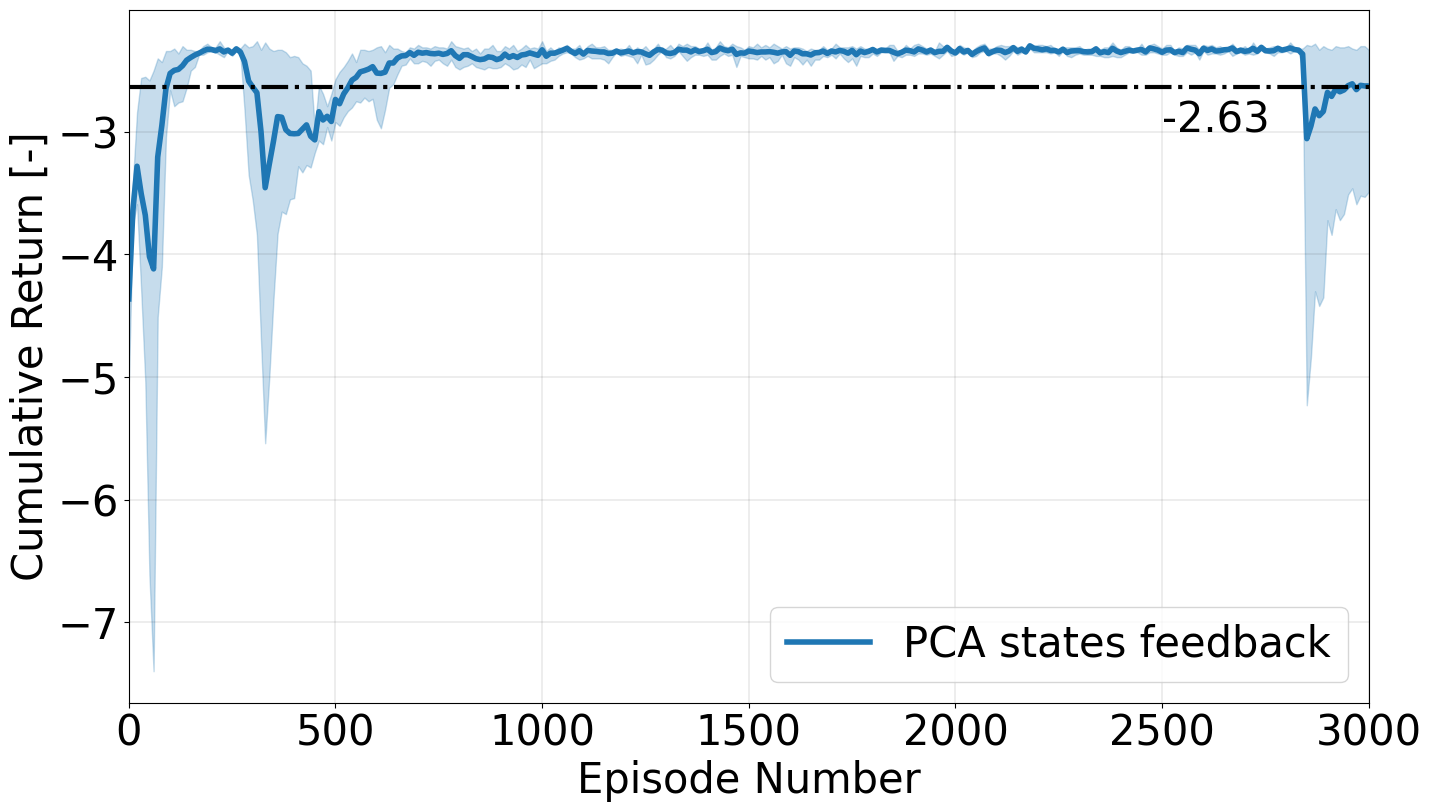

<Figure size 640x480 with 0 Axes>

In [56]:
save_fig = True

labels = 'PCA states feedback'
results = testing_rwd
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

plt.ylabel('Cumulative Return [-]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')

last_mean_value = np.round(np.mean(results[:,-1]),decimals=2)

plt.plot(episodes_vec, last_mean_value*np.ones(epi_len), 'k-.', linewidth=3)
plt.text(2500, -3, str(last_mean_value), fontsize=30)
plt.show()
if save_fig:
     plt.savefig('figures/Training_PCA_25degC_LearningCurve.pdf')


## 2. Temperature Constraint

In [57]:
testing_temp_vio = np.stack((eval_test0[:,temp_idx],
                        eval_test1[:,temp_idx],
                        eval_test2[:,temp_idx],
                        eval_test3[:,temp_idx]))
episodes_vec = np.arange(0,3010,10)

C:\Users\Di\AppData\Local\Temp\ipykernel_30464\870615240.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


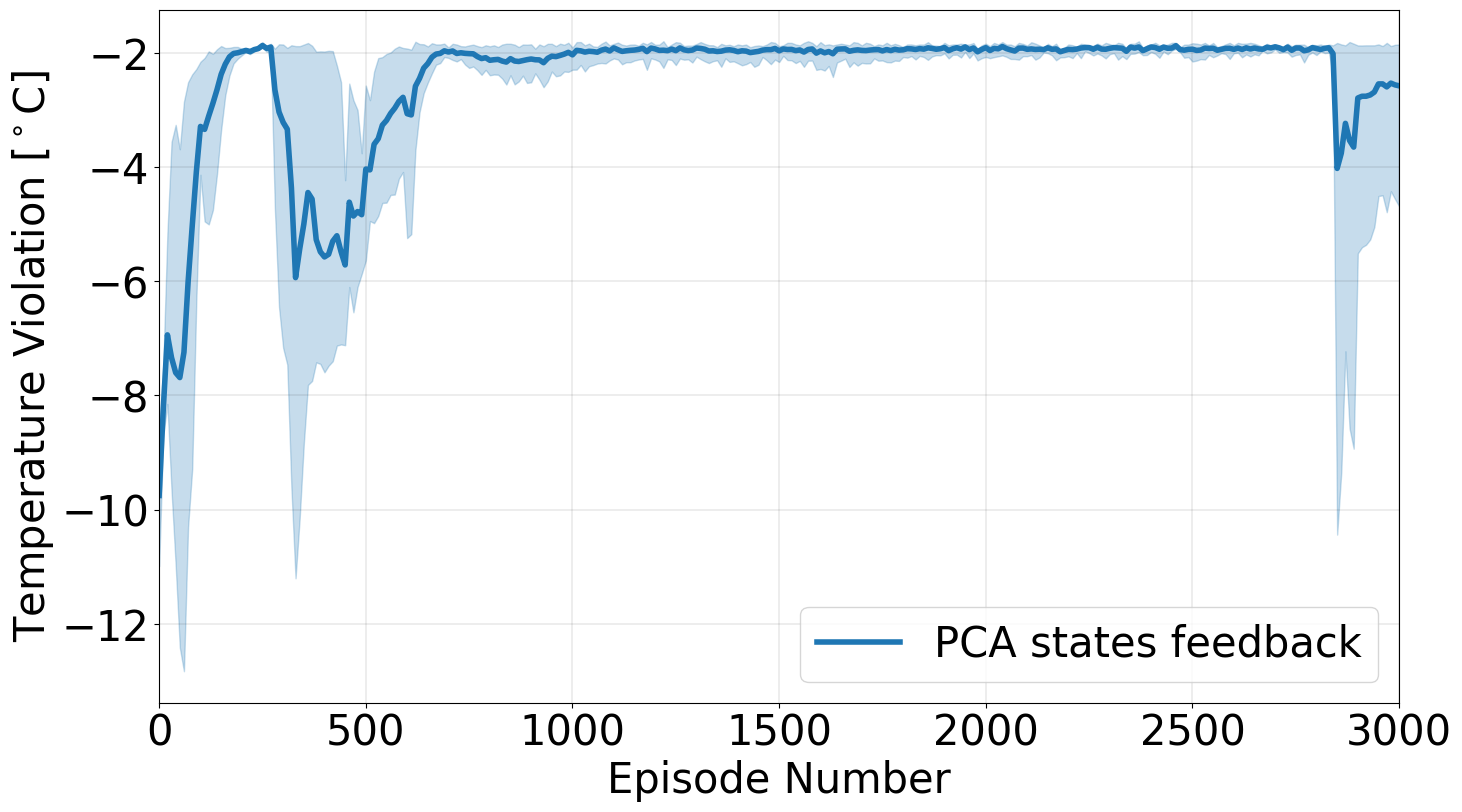

In [58]:
save_fig = True

labels = 'PCA states feedback'
results = testing_temp_vio - control_settings['constraints']['temperature']['max']
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

# plt.title("Temperature Constraint Violation", fontsize=25, fontweight="bold")
plt.ylabel('Temperature Violation [$^\circ$C]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')

if save_fig:
    plt.savefig('figures/Training_PCA_25degC_Temp_Violation.pdf', format='pdf')


## 3. EtasLN Constraint


In [59]:
testing_etas_vio = np.stack((eval_test0[:,etas_idx],
                        eval_test1[:,etas_idx],
                        eval_test2[:,etas_idx],
                        eval_test3[:,etas_idx]))
episodes_vec = np.arange(0,3010,10)

C:\Users\Di\AppData\Local\Temp\ipykernel_30464\430949336.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


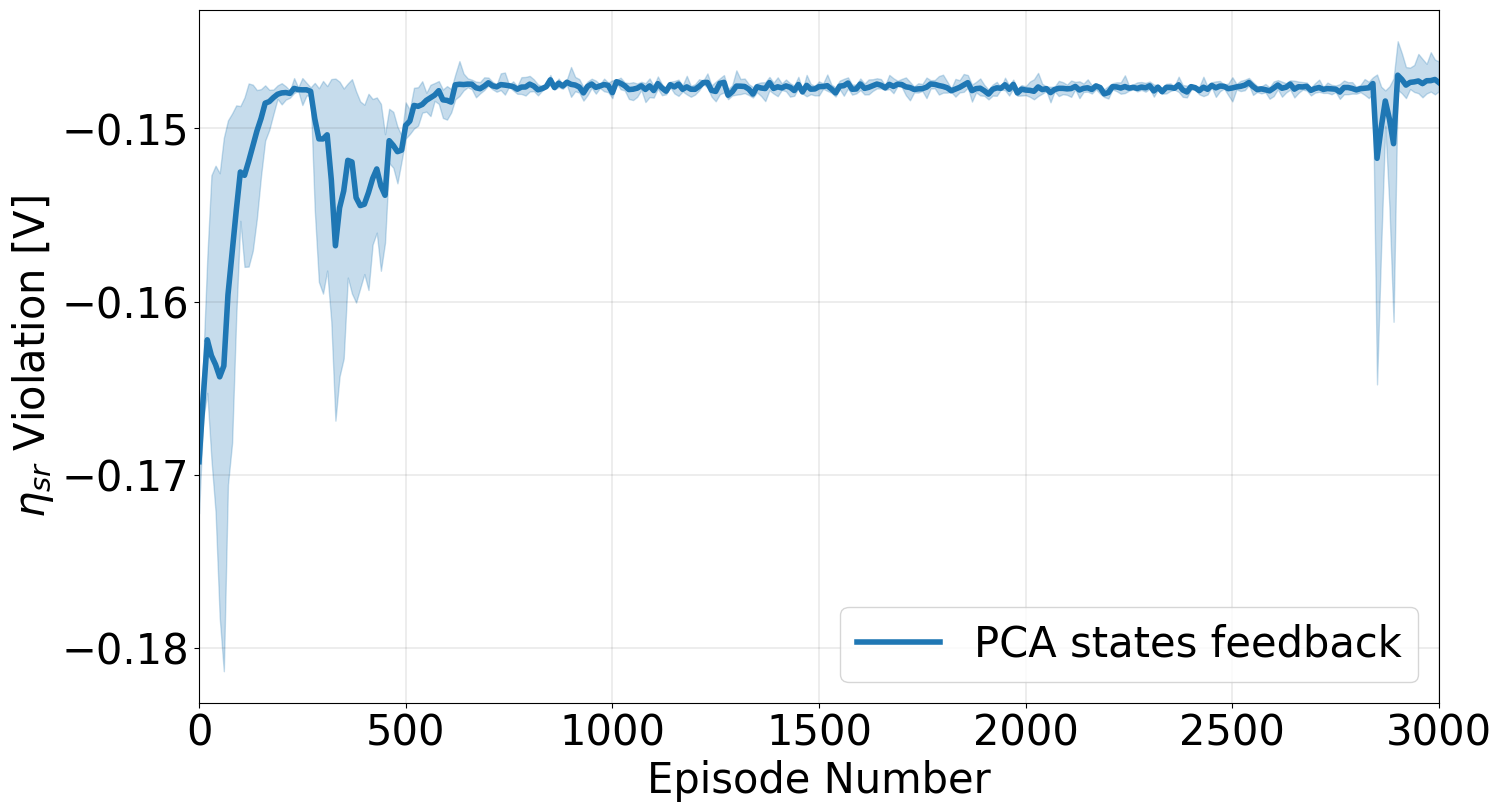

In [60]:
save_fig = True

labels = 'PCA states feedback'
results = control_settings['constraints']['etasLn']['min'] - testing_etas_vio
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

# plt.title(r"$\eta_{sr}$ Constraint Violation", fontsize=25, fontweight="bold")
plt.ylabel(r'$\eta_{sr}$ Violation [V]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')

if save_fig:
    plt.savefig('figures/Training_PCA_25degC_Etas_Violation.pdf', format='pdf')


## 4. Charging Time

In [61]:
testing_chg_time = np.stack((eval_test0[:,chgT_idx],
                        eval_test1[:,chgT_idx],
                        eval_test2[:,chgT_idx],
                        eval_test3[:,chgT_idx]))
episodes_vec = np.arange(0,3010,10)

C:\Users\Di\AppData\Local\Temp\ipykernel_30464\2408055404.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


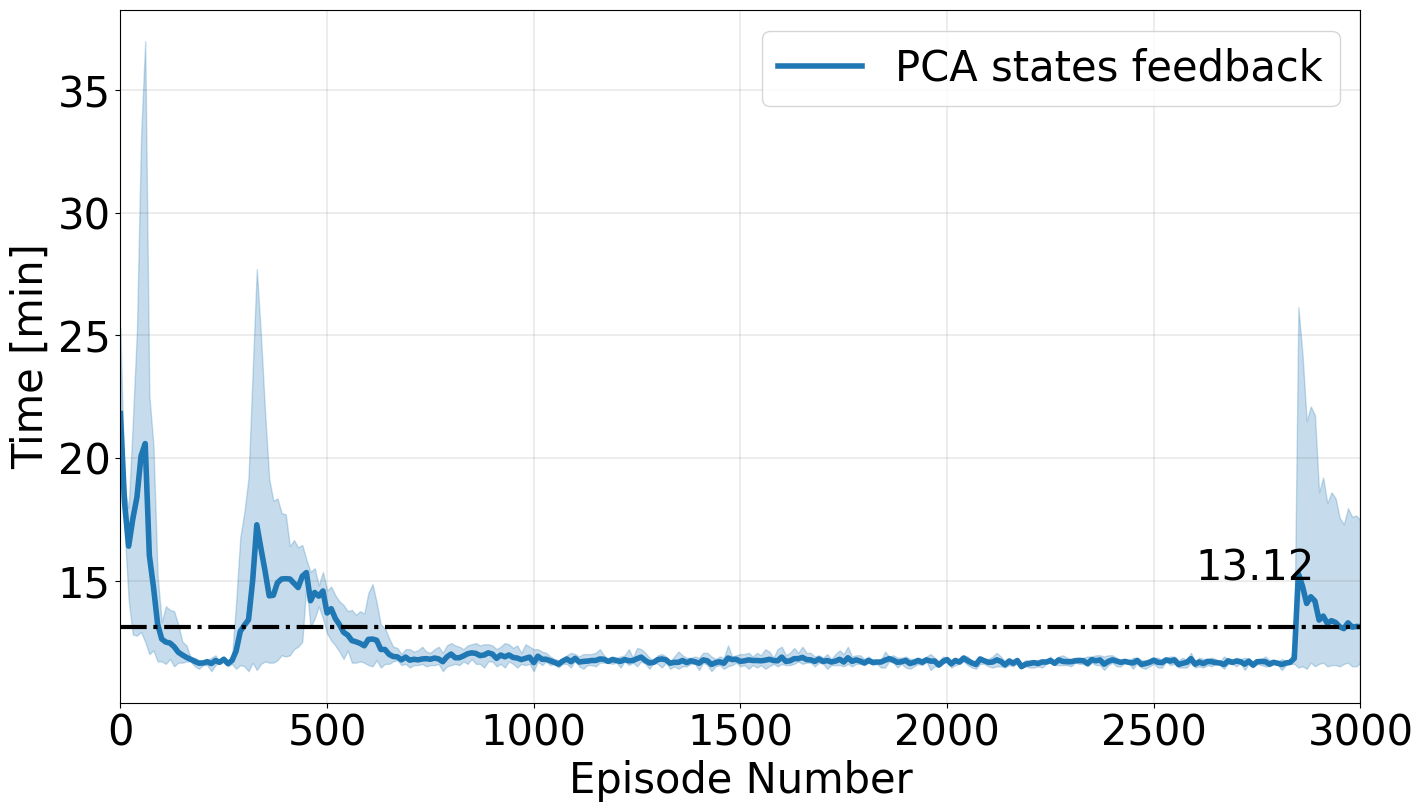

In [62]:
save_fig = True

labels = 'PCA states feedback'
results = testing_chg_time * settings['sample_time'] / 60 # converted to minutes
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))
last_mean_value = np.round(np.mean(results[:,-1]),decimals=2)
plt.plot(episodes_vec, last_mean_value*np.ones(epi_len), 'k-.', linewidth=3)
plt.text(2600, 15, str(last_mean_value), fontsize=30)
plt.ylabel(r'Time [min]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='upper right')


if save_fig:
    plt.savefig('figures/Training_PCA_25degC_ChgTime.pdf', format='pdf')


## 5. Validation

In [63]:
import gymnasium as gym
import torch
from ddpg_agent import Agent
import ipdb

import logz
import scipy.signal
import gym

import gym_dfn
# from gym_dfn.envs.dfn_env import *

from gym_dfn.envs.ParamFile_LCO2 import p

import statistics
import pickle
import os
from settings_file import*

#------------ For PCA 
from numpy import linalg as LA
import scipy.io as sio
data = sio.loadmat('PCA_DFN_info.mat')
data_mu = data['time_states_mu']
data_std = data['time_states_std']
data_PCA = data['PCA_trans']

In [64]:
def normalize_states(state):

    csn_max = 3.0542e+04
    csp_max = 4.9521e+04
    ce0 = 1.0e3
    T_amb = 298.15

    N_cavgn = p['Nxn']-1
    N_cavgp = p['Nxp']-1
    N_cex = p['Nxn']-1 + p['Nxs']-1 + p['Nxp']-1

    # PCA Normalize the states.
    c_avgn_concentration = state[:N_cavgn]
    c_avgp_concentration = state[N_cavgn : (N_cavgn + N_cavgp)]
    c_ex_concentration = state[(N_cavgn+N_cavgp):(N_cavgn+N_cavgp+N_cex)]

    time_states = np.concatenate((c_avgn_concentration, c_avgp_concentration, c_ex_concentration), axis=0)
    time_states_arr = time_states.reshape([time_states.shape[0],1])
    standard_states_arr = (time_states_arr - data_mu)/data_std
    pca_states_arr = np.dot(data_PCA, standard_states_arr)
    pca_states_arr_nmz = pca_states_arr / LA.norm(pca_states_arr,2)

    pca_states_nmz = pca_states_arr_nmz.reshape([pca_states_arr_nmz.shape[0],]) # arr -> list


    # # Concatenate
    Temp = (state[-1] - 298 - 10) / (320-298)
    Temp = np.array([Temp])

    second_part = np.concatenate((pca_states_nmz,Temp),axis=0)

    norm_state = second_part

    return norm_state

In [65]:
def denormalize_input(input_value, min_OUTPUT_value, max_OUTPUT_value):
    
    output_value=(1+input_value)*(max_OUTPUT_value-min_OUTPUT_value)/2+min_OUTPUT_value
    
    return output_value

In [66]:
# Policy
agent = Agent(state_size=5, action_size=1, random_seed=0)    

# Load
# Choose the policy, which episode's policy do you want to choose for validation?
# i_episode=checkpoints_list[-1]  # the latest
i_episode=3000

i_training=1 # seed number or ID

agent.actor_local.load_state_dict(torch.load('results/training_results/training'+str(i_training)+'/episode'+str(i_episode)+'/checkpoint_actor_'+str(i_episode)+'.pth',map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('results/training_results/training'+str(i_training)+'/episode'+str(i_episode)+'/checkpoint_critic_'+str(i_episode)+'.pth',map_location='cpu'))



<All keys matched successfully>

In [67]:
# Environment
# settings['sample_time']=1
import sys
# appending a path
sys.path.append('D:/python/code/RL-BATT-DDPG/StateFeedback_RL/gym_dfn/envs/dfn_env.py')
from gym_dfn.envs.dfn_env import DFN
from settings_file import *
#DFN = my_module.DFN()
import gym_dfn 
path = "D:\python\code\RL-BATT-DDPG\StateFeedback_RL\gym_dfn\envs/dfn_env.py"
env = DFN(sett=settings, cont_sett=control_settings)

init_V = 3.5
init_T = 300
state = env.reset(init_v = init_V, init_t=init_T)
norm_state = normalize_states(state)

ACTION_VEC=[]
SOC_VEC=[]
T_VEC=[]
VOLTAGE_VEC=[]
RETURN_VALUE=0
TIME_VEC = []
done=False

cex_sim = []
etasLn_sim = []
cssn_sim = []
cssp_sim = []
cavgn_sim = []
cavgp_sim = []
nLis_sim = []

phi_s_n_sim = []
phi_s_p_sim = []
ien_sim = []
iep_sim = []
jn_sim =[]
jp_sim = []
phi_e_sim = []



tt=0
TIME_VEC.append(tt)

for t in range(10000):

    # the exploration noise has been disabled
    norm_action = agent.act(norm_state, add_noise=False)

    applied_action=denormalize_input(norm_action,
                                             env.action_space.low[0],
                                             env.action_space.high[0])    
    applied_action=applied_action
    next_state,reward,done,b=env.step(applied_action)
    norm_next_state=normalize_states(next_state)
    RETURN_VALUE+=reward
    
    #save the simulation vectors
    ACTION_VEC.append(applied_action[0])
    SOC_VEC.append(env.info['SOCn'])
    T_VEC.append(env.info['T'])
    
    #save the simulation info
    cex_sim.append(env.c_ex)
    etasLn_sim.append(env.etasLn)
    cssn_sim.append(env.cssn)
    cssp_sim.append(env.cssp)
    cavgn_sim.append(env.c_avgn)
    cavgp_sim.append(env.c_avgp)
    nLis_sim.append(env.nLis)
    
    # save the algebraic states info.
    phi_s_n_sim.append(env.out_phisn)
    phi_s_p_sim.append(env.out_phisp)
    ien_sim.append(env.out_ien)
    iep_sim.append(env.out_iep)
    jn_sim.append(env.out_jn)
    jp_sim.append(env.out_jp)
    phi_e_sim.append(env.out_phie)

    tt += env.dt
    TIME_VEC.append(tt)
    VOLTAGE_VEC.append(env.info['V'])
    norm_state=norm_next_state
    

    if done:
        break

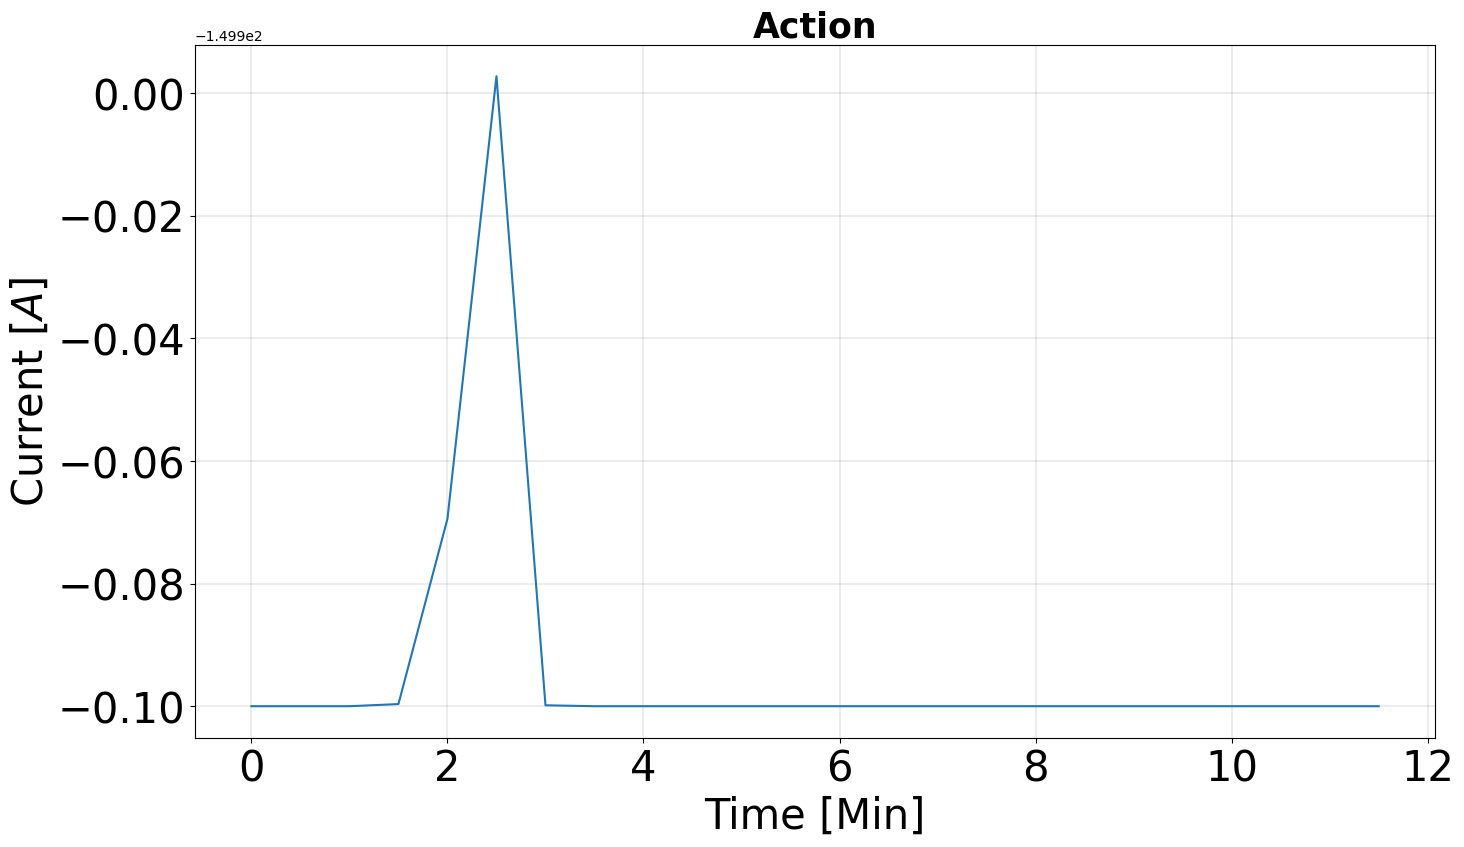

In [68]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


plt.plot(np.array(TIME_VEC[:-1])/60,np.array(ACTION_VEC))
plt.title("Action", fontsize=25, fontweight="bold")
plt.ylabel(r'Current [$A$]', fontsize=30)
plt.xlabel('Time [Min]', fontsize=30)
plt.tick_params(labelsize=30)


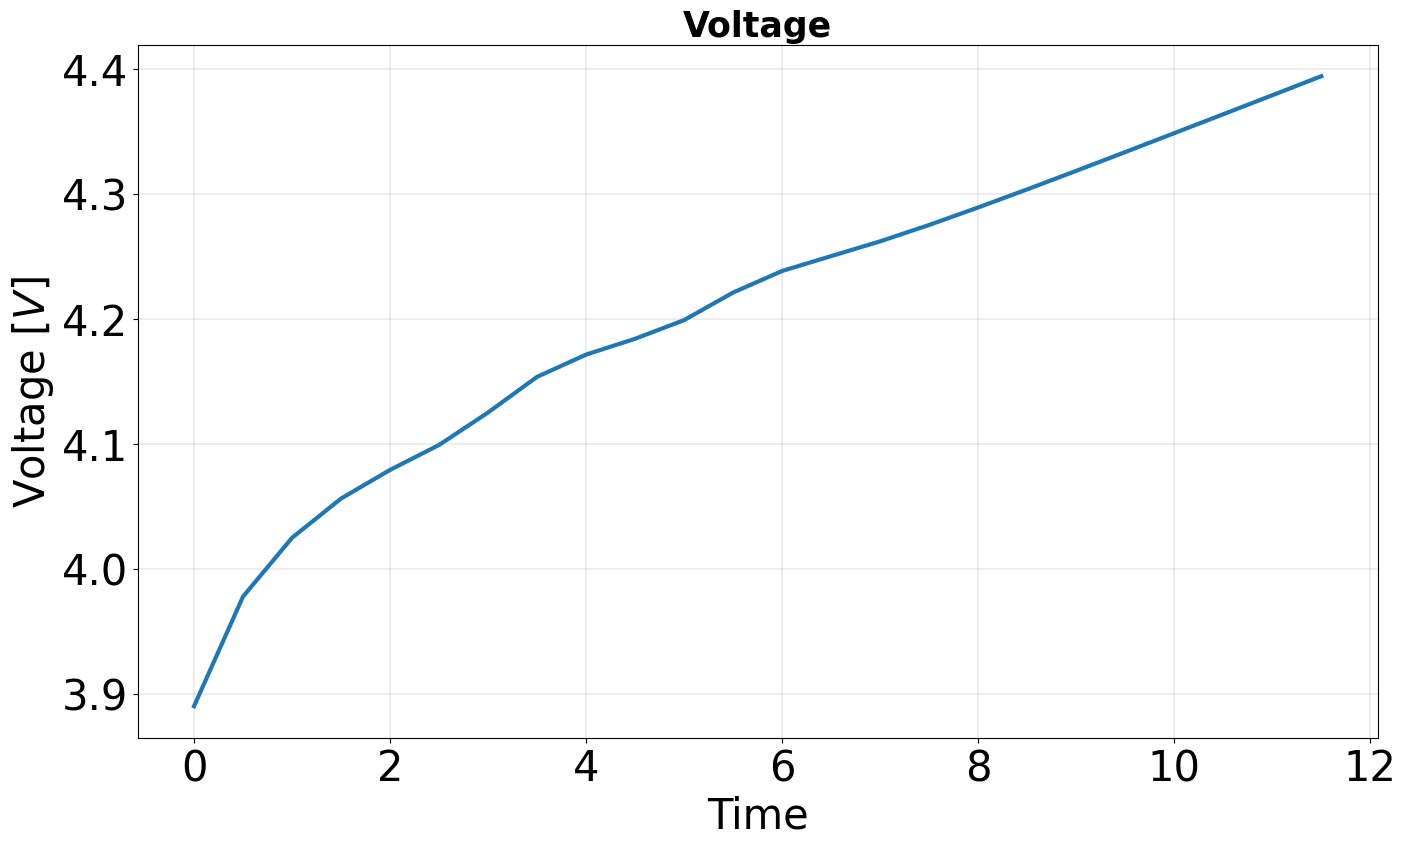

In [69]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)

plt.plot(np.array(TIME_VEC[:-1])/60,np.array(VOLTAGE_VEC), linewidth=3)
# plt.plot(np.array(TIME_VEC[:-1])/60,np.array(VOLTAGE_VEC), LineWidth=3)
# plt.plot(np.array(TIME_VEC[:-1])/60,4.2*np.ones([len(VOLTAGE_VEC),]),'k--', LineWidth=3)
plt.title("Voltage", fontsize=25, fontweight="bold")
plt.ylabel('Voltage [$V$]', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.tick_params(labelsize=30)

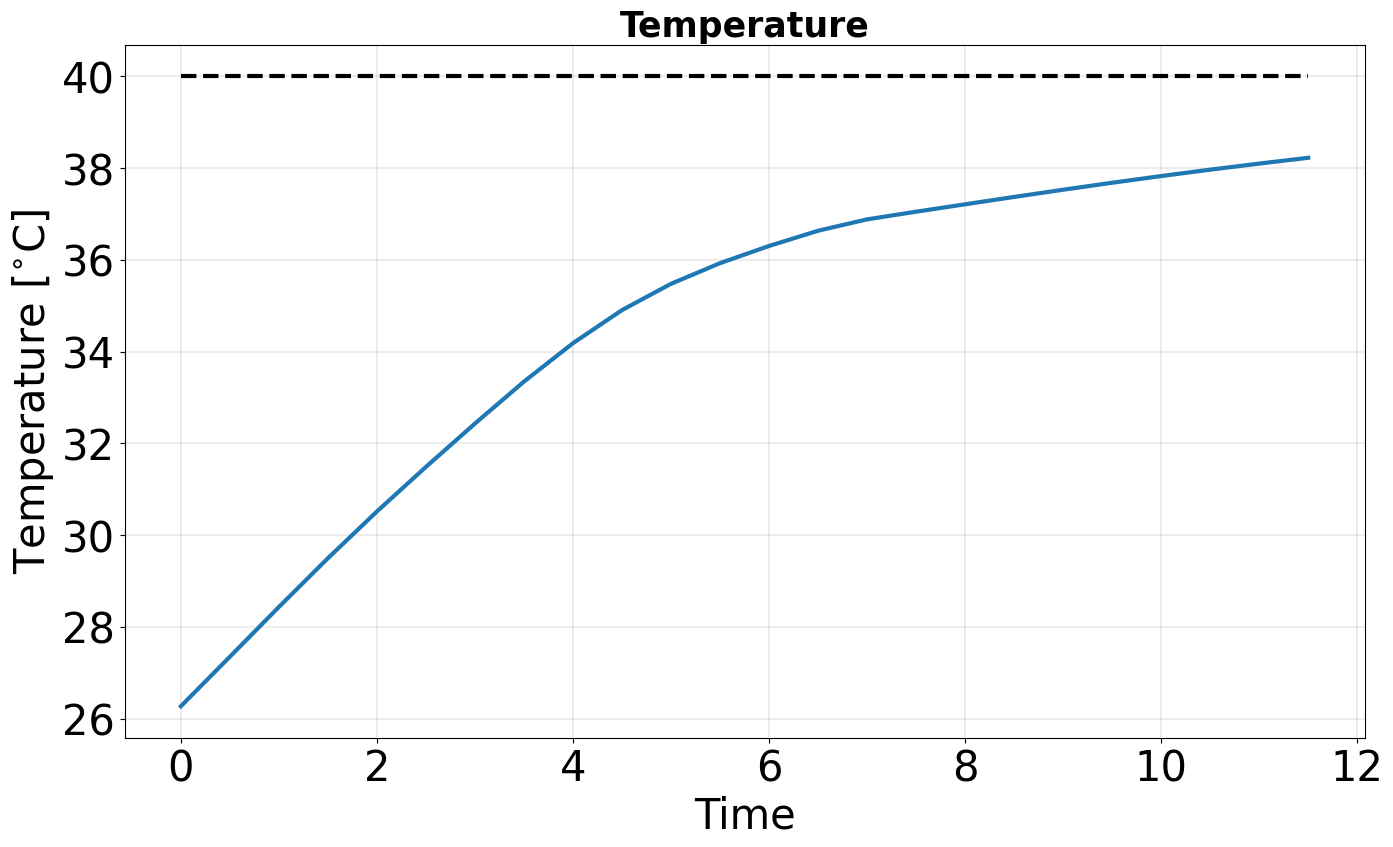

In [70]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)

temp_th = control_settings['constraints']['temperature']['max']

plt.plot(np.array(TIME_VEC[:-1])/60,np.array(T_VEC)-273, linewidth=3)
plt.plot(np.array(TIME_VEC[:-1])/60,(temp_th-273)*np.ones([len(T_VEC),]),'k--', linewidth=3)
plt.title("Temperature", fontsize=25, fontweight="bold")
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.tick_params(labelsize=30)

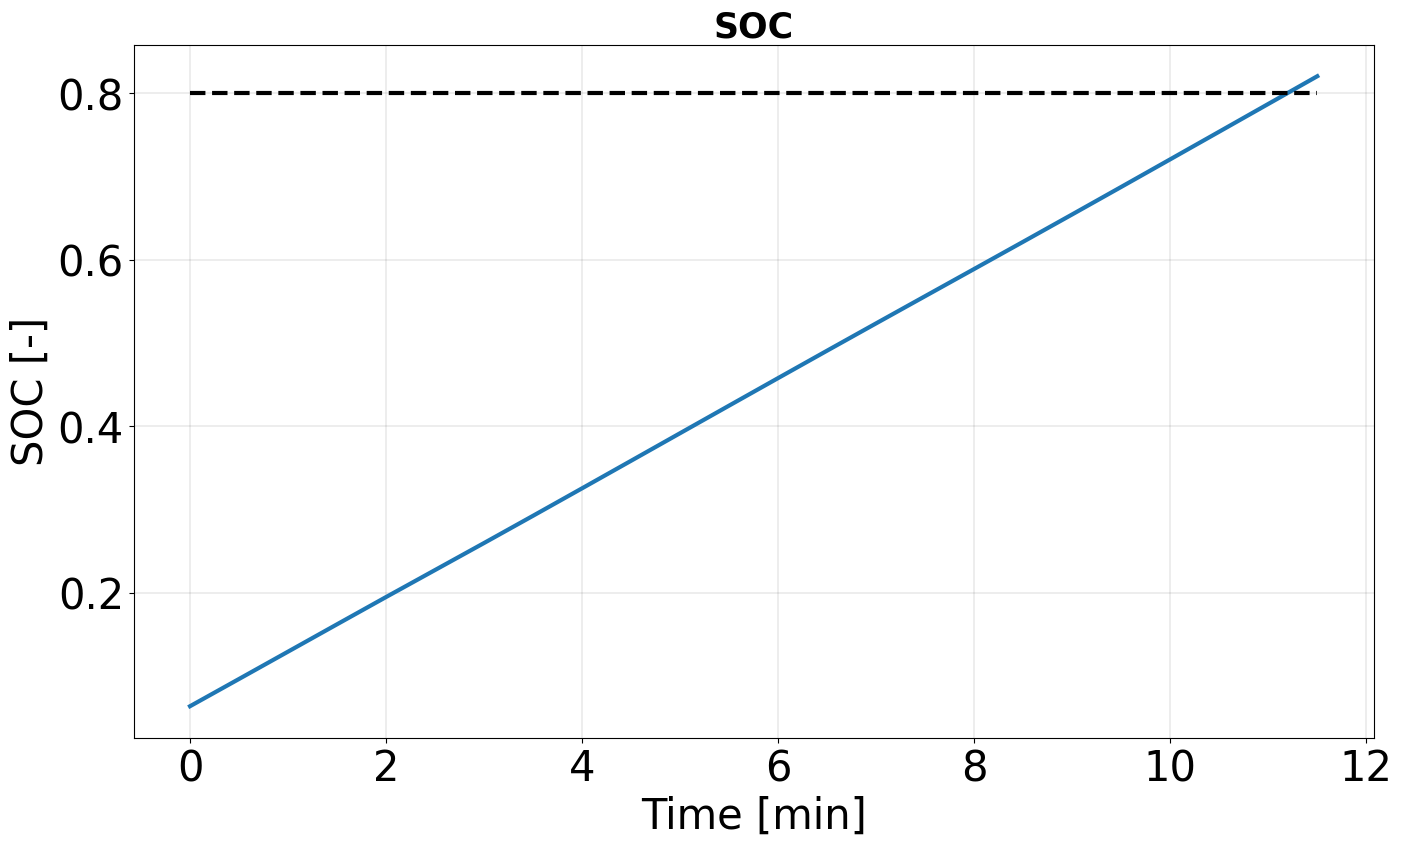

In [71]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


plt.plot(np.array(TIME_VEC[:-1])/60,np.array(SOC_VEC), linewidth=3)
plt.plot(np.array(TIME_VEC[:-1])/60,0.8*np.ones([len(SOC_VEC),]),'k--', linewidth=3)
plt.title("SOC", fontsize=25, fontweight="bold")
plt.ylabel('SOC [-]', fontsize=30)
plt.xlabel('Time [min]', fontsize=30)
plt.tick_params(labelsize=30)


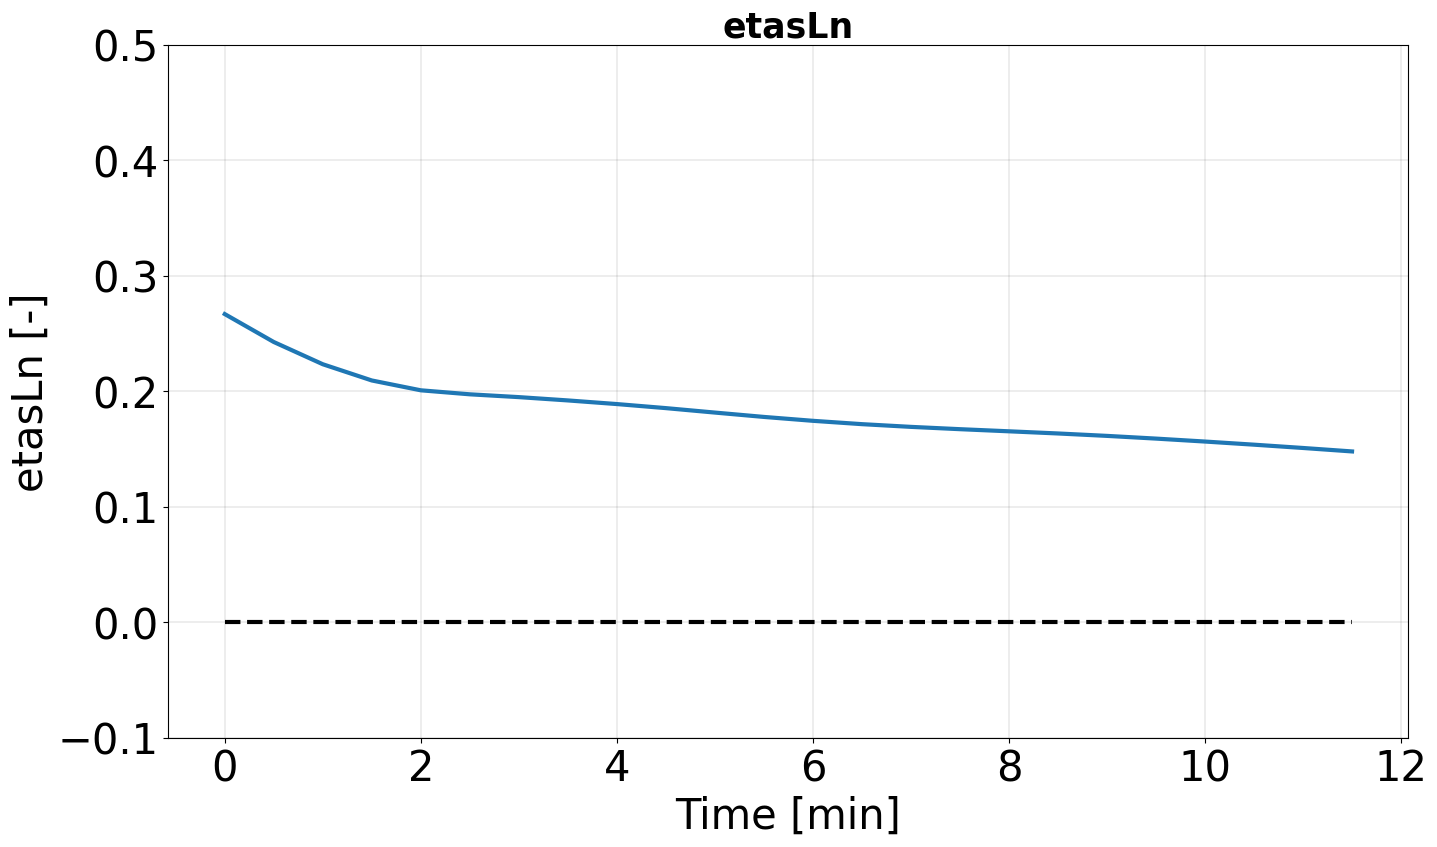

In [72]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)

etasLn_th = control_settings['constraints']['etasLn']['min']
plt.plot(np.array(TIME_VEC[:-1])/60,np.array(etasLn_sim), linewidth=3)
plt.plot(np.array(TIME_VEC[:-1])/60,etasLn_th*np.ones([len(SOC_VEC),]),'k--', linewidth=3)
plt.title("etasLn", fontsize=25, fontweight="bold")
plt.ylim((-0.1, 0.5))
plt.ylabel('etasLn [-]', fontsize=30)
plt.xlabel('Time [min]', fontsize=30)
plt.tick_params(labelsize=30)
